In [43]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import joblib
import pickle

In [44]:
!pip show pandas_datareader

Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.10/dist-packages
Requires: lxml, pandas, requests
Required-by: 


In [45]:
crypto_1 = 'BTC' #bitcoin
crypto_2 = 'BNB' #binance
crypto_3 = 'LTC' #litecoin
against_currency = 'USD'

In [46]:
data_1 = yf.download(f'{crypto_1}-{against_currency}', start='2012-1-1', end=dt.datetime.now())
data_2 = yf.download(f'{crypto_2}-{against_currency}', start='2017-8-1', end=dt.datetime.now())
data_3 = yf.download(f'{crypto_3}-{against_currency}', start='2020-1-1', end=dt.datetime.now())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [47]:
data_1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [48]:
data_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,2.05314,2.17423,1.89394,1.99077,1.99077,19192200
2017-11-10,2.00773,2.06947,1.64478,1.79684,1.79684,11155000
2017-11-11,1.78628,1.91775,1.61429,1.67047,1.67047,8178150
2017-11-12,1.66889,1.67280,1.46256,1.51969,1.51969,15298700
2017-11-13,1.52601,1.73502,1.51760,1.68662,1.68662,12238800


In [49]:
data_3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,41.326534,42.285019,41.288033,42.017719,42.017719,2782992323
2020-01-02,42.018085,42.134747,39.683567,39.823013,39.823013,2759827139
2020-01-03,39.863129,42.447174,39.450844,42.415573,42.415573,3260961326
2020-01-04,42.383526,43.342705,41.933075,43.326607,43.326607,2843192897
2020-01-05,43.291382,44.733616,42.998535,43.553207,43.553207,3017148033


In [50]:
data_1['Time'] = np.arange(len(data_1.index))
data_2['Time'] = np.arange(len(data_2.index))
data_3['Time'] = np.arange(len(data_3.index))

data_1['lag_1'] = data_1['Close'].shift(1)
data_1['lag_2'] = data_1['Close'].shift(2)
data_1['lag_3'] = data_1['Close'].shift(3)
data_1['lag_4'] = data_1['Close'].shift(4)
data_1['lag_5'] = data_1['Close'].shift(5)
data_1.dropna(inplace = True)

data_2['lag_1'] = data_2['Close'].shift(1)
data_2['lag_2'] = data_2['Close'].shift(2)
data_2['lag_3'] = data_2['Close'].shift(3)
data_2['lag_4'] = data_2['Close'].shift(4)
data_2['lag_5'] = data_2['Close'].shift(5)
data_2.dropna(inplace = True)

data_3['lag_1'] = data_3['Close'].shift(1)
data_3['lag_2'] = data_3['Close'].shift(2)
data_3['lag_3'] = data_3['Close'].shift(3)
data_3['lag_4'] = data_3['Close'].shift(4)
data_3['lag_5'] = data_3['Close'].shift(5)
data_3.dropna(inplace = True)

In [51]:
data_1 = data_1.reset_index()
data_1['Row_Number'] = np.arange(1, len(data_1) + 1)

In [52]:
data_2 = data_2.reset_index()
data_2['Row_Number'] = np.arange(1, len(data_2) + 1)

In [53]:
data_3 = data_3.reset_index()
data_3['Row_Number'] = np.arange(1, len(data_3) + 1)

In [54]:
prep_btc =data_1[['Close','lag_1','lag_2','lag_3','lag_4','lag_5','Time']]
prep_btc.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,Time
0,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,5
1,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,6
2,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,7
3,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,8
4,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,9


In [55]:


prep_bnb =data_2[['Close','lag_1','lag_2','lag_3','lag_4','lag_5','Time']]
prep_bnb.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,Time
0,1.59258,1.68662,1.51969,1.67047,1.79684,1.99077,5
1,1.53045,1.59258,1.68662,1.51969,1.67047,1.79684,6
2,1.57792,1.53045,1.59258,1.68662,1.51969,1.67047,7
3,1.51036,1.57792,1.53045,1.59258,1.68662,1.51969,8
4,1.67433,1.51036,1.57792,1.53045,1.59258,1.68662,9


In [56]:
prep_ltc =data_1[['Close','lag_1','lag_2','lag_3','lag_4','lag_5','Time']]
prep_ltc.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,Time
0,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,5
1,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,6
2,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,7
3,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,8
4,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,9


In [57]:
split_index1 = int(0.8*len(prep_btc))
x1_train = pd.DataFrame(prep_btc.iloc[:split_index1, 1:])
y1_train = pd.DataFrame(prep_btc.iloc[:split_index1, 0])
x1_test = pd.DataFrame(prep_btc.iloc[split_index1:, 1:])
y1_test = pd.DataFrame(prep_btc.iloc[split_index1:, 0])

split_index2 = int(0.8*len(prep_bnb))
x2_train = pd.DataFrame(prep_bnb.iloc[:split_index2, 1:])
y2_train = pd.DataFrame(prep_bnb.iloc[:split_index2, 0])
x2_test = pd.DataFrame(prep_bnb.iloc[split_index2:, 1:])
y2_test = pd.DataFrame(prep_bnb.iloc[split_index2:, 0])

split_index3 = int(0.8*len(prep_ltc))
x3_train = pd.DataFrame(prep_ltc.iloc[:split_index3, 1:])
y3_train = pd.DataFrame(prep_ltc.iloc[:split_index3, 0])
x3_test = pd.DataFrame(prep_ltc.iloc[split_index3:, 1:])
y3_test = pd.DataFrame(prep_ltc.iloc[split_index3:, 0])

In [58]:
print(x1_train.dtypes)
print(y1_train.dtypes)


lag_1    float64
lag_2    float64
lag_3    float64
lag_4    float64
lag_5    float64
Time       int64
dtype: object
Close    float64
dtype: object


LINEAR REGRESSION

BITCOIN

In [59]:
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
LR1.fit(x1_train, y1_train)

LinearRegression()

In [60]:
#score for bitcoin
LR1_pred = LR1.predict(x1_test)
LR1.score(x1_test, y1_test)


0.9958559440280672

In [61]:
mean_squared_error(y1_test, LR1_pred)

1263041.9395886299

BINANCE

In [62]:
LR2 = LinearRegression()
LR2.fit(x2_train, y2_train)

LinearRegression()

In [63]:
#score for binance
LR2_pred = LR2.predict(x2_test)
LR2.score(x2_test, y2_test)

0.9931410214411643

In [64]:
mean_squared_error(y2_test, LR2_pred)

156.10759499651508

LITECOIN

In [65]:
LR3 = LinearRegression()
LR3.fit(x3_train, y3_train)

LinearRegression()

In [66]:
#score for binance
LR3_pred = LR3.predict(x3_test)
LR3.score(x3_test, y3_test)

0.9958559440280672

In [67]:


mean_squared_error(y3_test, LR3_pred)

1263041.9395886299

BITCOIN GRAPH

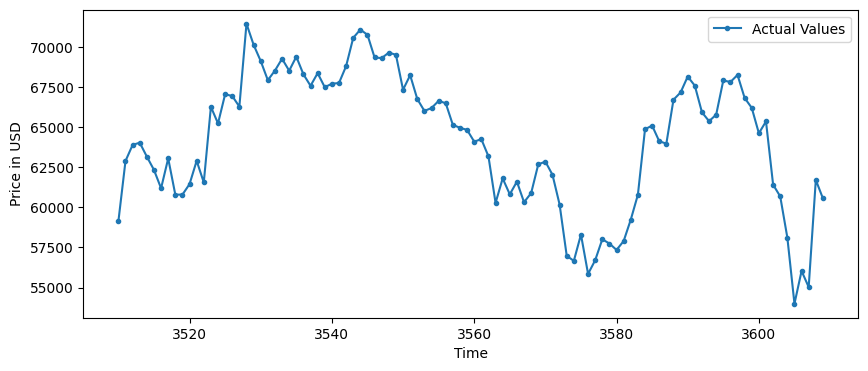

In [68]:


import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y1_test[-100:], label='Actual Values', marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

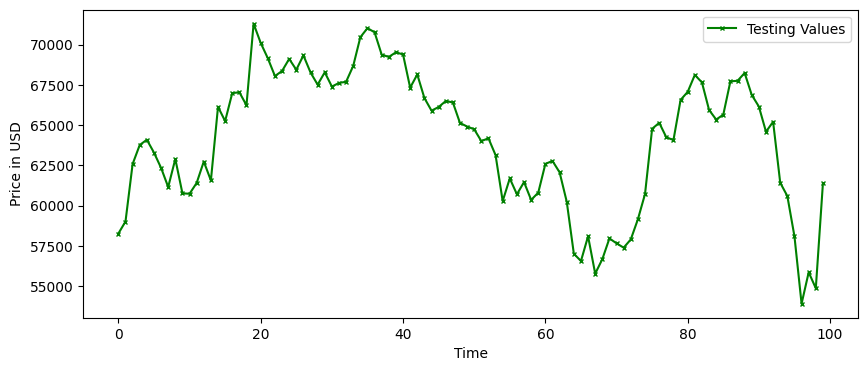

In [69]:
plt.figure(figsize=(10, 4))
plt.plot(LR1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

BINANCE GRAPH

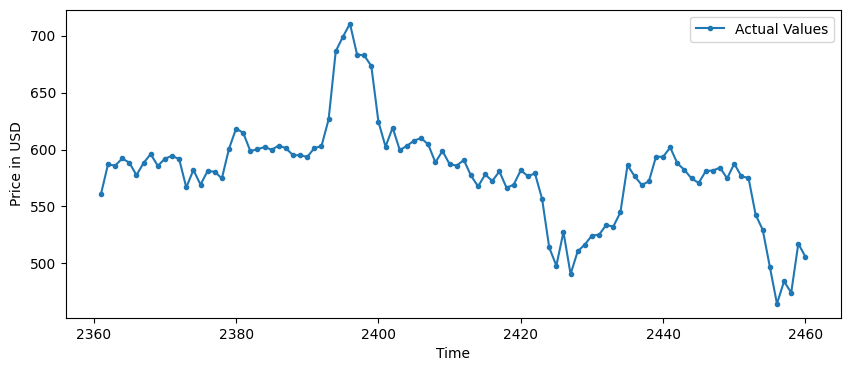

In [70]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y2_test[-100:], label='Actual Values', marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

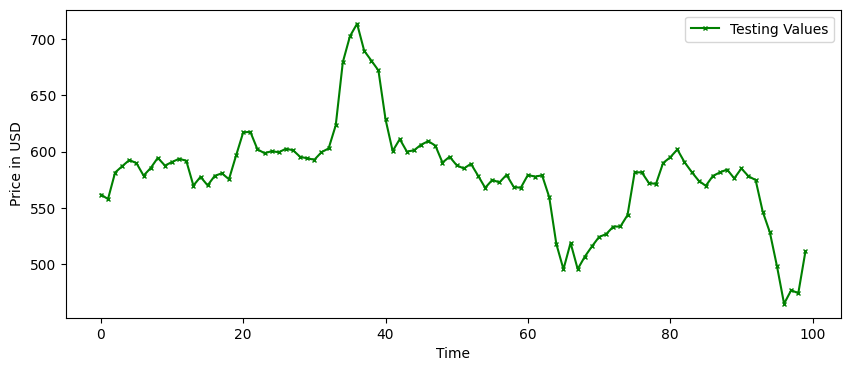

In [71]:
plt.figure(figsize=(10, 4))
plt.plot(LR2_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

LITE GRAPH

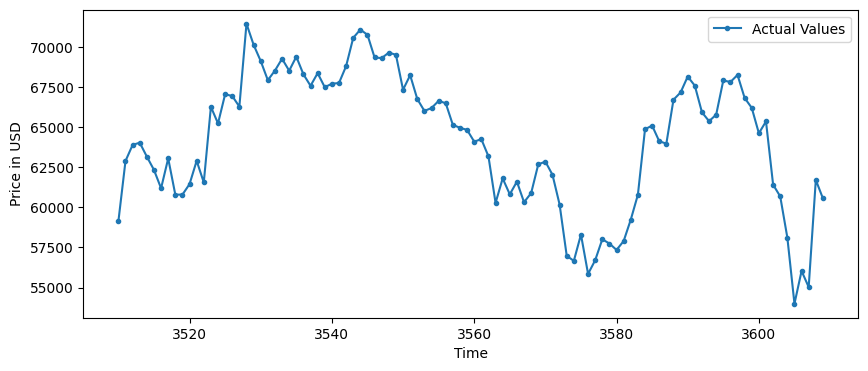

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(y3_test[-100:], label='Actual Values', marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

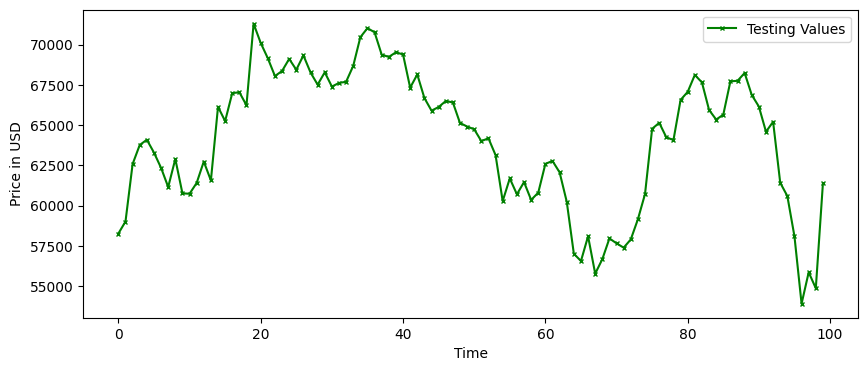

In [73]:

plt.figure(figsize=(10, 4))
plt.plot(LR3_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

Function for predicting future days

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

def prediction(model, days, train, test):
    future_steps = days
    future_features = train.iloc[-1].values.reshape(1, -1)
    future_predictions = []

    for _ in range(future_steps):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=pd.errors.PerformanceWarning)
        future_pred = model.predict(future_features)
        future_predictions.append(future_pred[0])
        future_features = np.roll(future_features, shift=-1)
        future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment

    # Get today's date
    today = pd.Timestamp.today()

    # Generate future dates starting from today
    future_dates = pd.date_range(start=today, periods=days + 1, freq='D')[1:]

    plt.figure(figsize=(15, 4))
    plt.plot(future_dates, future_predictions, color='black', label='Future Predictions', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Time Series Forecasting')
    plt.legend()
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = f

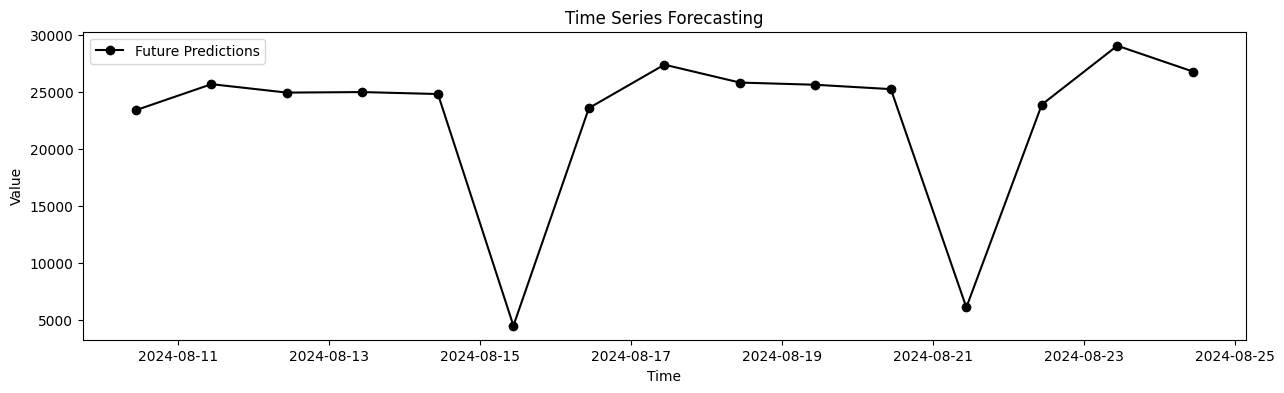

In [75]:







#prediction for bitcoin
prediction(LR1, 15, x1_train, x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = f

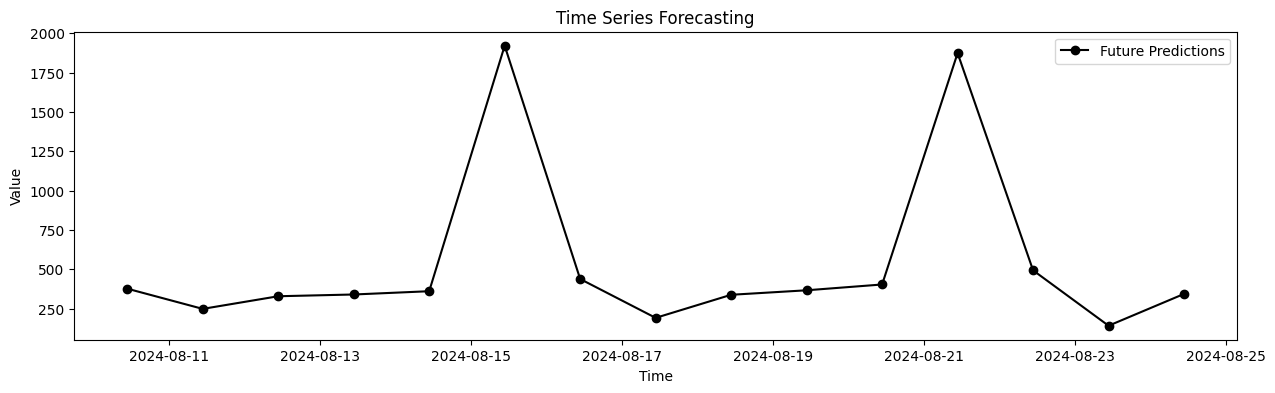

In [76]:
#prediction for binance
prediction(LR1, 15, x2_train, x2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = f

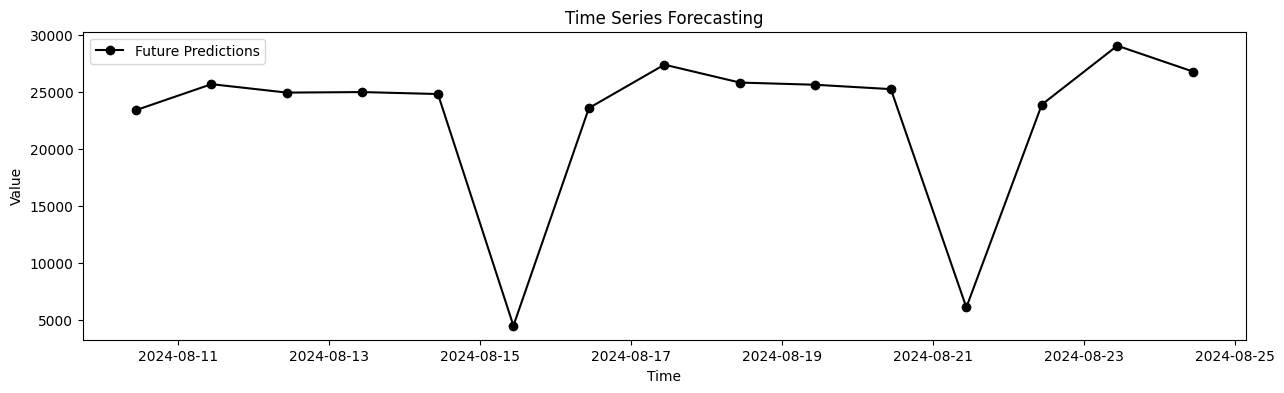

In [77]:
#prediction for litecoin
prediction(LR1, 15, x3_train, x3_test)

Support Vector Regression

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Create a pipeline with scaling and SVR
pipeline = make_pipeline(StandardScaler(), SVR(kernel='linear'))

# Fit the model
pipeline.fit(x1_train, y1_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline with scaling and SVR
pipeline = make_pipeline(StandardScaler(), SVR(kernel='linear'))

# Fit the model
pipeline.fit(x1_train, y1_train)
y1_pred = pipeline.predict(x1_test)

pipeline.fit(x2_train, y2_train)
y2_pred = pipeline.predict(x2_test)

pipeline.fit(x3_train, y3_train)
y3_pred = pipeline.predict(x3_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#bitcoin
# Calculate evaluation metrics
mse = mean_squared_error(y1_test, y1_pred)
mae = mean_absolute_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 168943475.31166953
Mean Absolute Error: 10365.597762608415
R^2 Score: 0.4456944018720205


In [95]:
#binance: Calculate evaluation metrics
mse = mean_squared_error(y2_test, y2_pred)
mae = mean_absolute_error(y2_test, y2_pred)
r2 = r2_score(y2_test, y2_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 240.09561062212492
Mean Absolute Error: 9.121592891879098
R^2 Score: 0.9894507974108213


In [96]:
#litecoin: Calculate evaluation metrics
mse = mean_squared_error(y3_test, y3_pred)
mae = mean_absolute_error(y3_test, y3_pred)
r2 = r2_score(y3_test, y3_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)

Mean Squared Error: 168943475.31166953
Mean Absolute Error: 10365.597762608415
R^2 Score: 0.4456944018720205


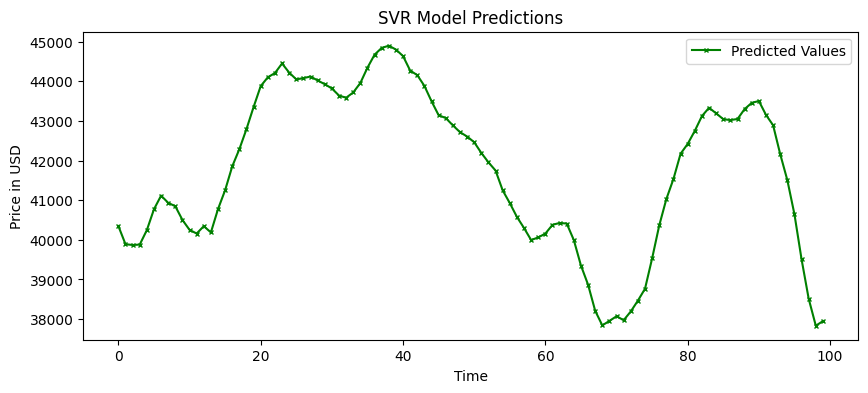

In [100]:
import matplotlib.pyplot as plt

# Make predictions using the pipeline
y_pred = pipeline.predict(x1_test)

# Plot the last 100 predictions from the test set
plt.figure(figsize=(10, 4))
plt.plot(y_pred[-100:], label='Predicted Values', marker='x', color='green', markersize=3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.title('SVR Model Predictions')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but 

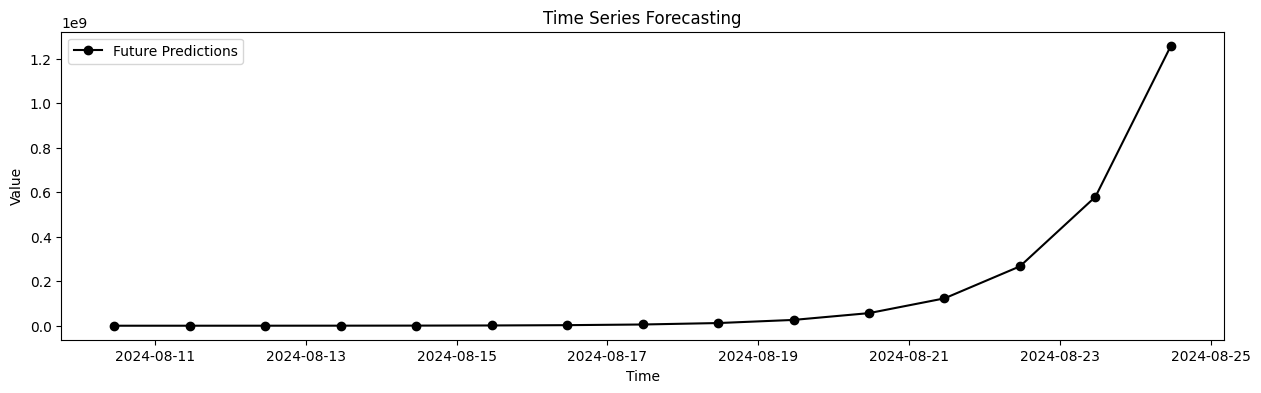

In [101]:
prediction(pipeline, 15, x1_train, x1_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but 

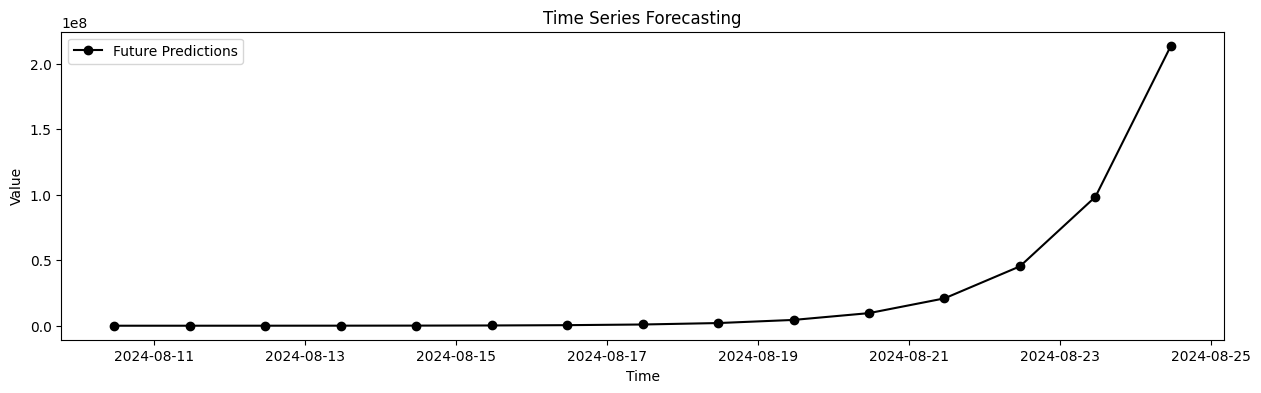

In [102]:
prediction(pipeline, 15, x2_train, x2_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but 

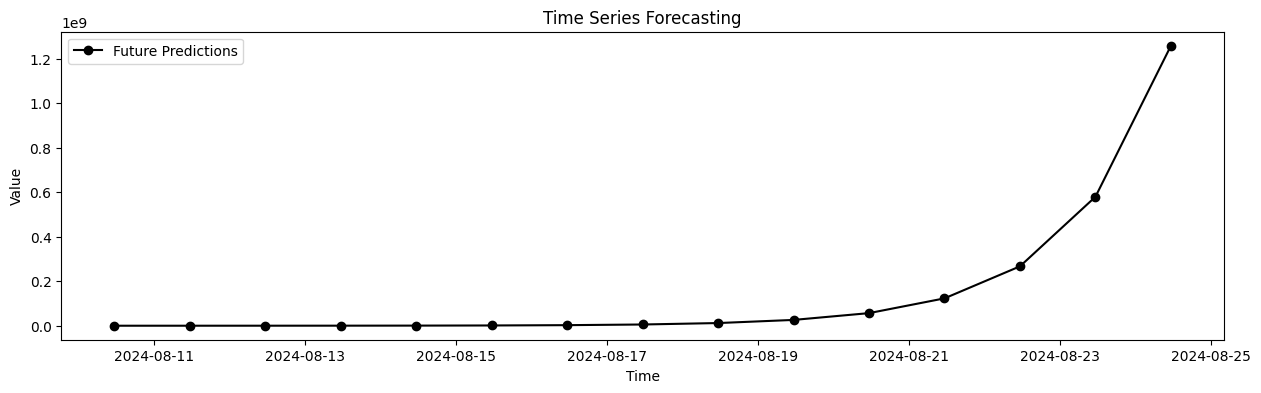

In [103]:
prediction(pipeline, 15, x3_train, x3_test)

DECISION TREE

In [104]:
from sklearn.tree import DecisionTreeRegressor
DTR_1 = DecisionTreeRegressor(random_state = 0, criterion = 'friedman_mse', max_depth = 15)
DTR_1.fit(x1_train, y1_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15, random_state=0)

In [105]:
DTR_1.score(x1_test, y1_test)

0.9433114891001942

In [106]:
DTR1_pred = DTR_1.predict(x1_test)
mean_squared_error(y1_test, DTR1_pred)

17277750.890485216

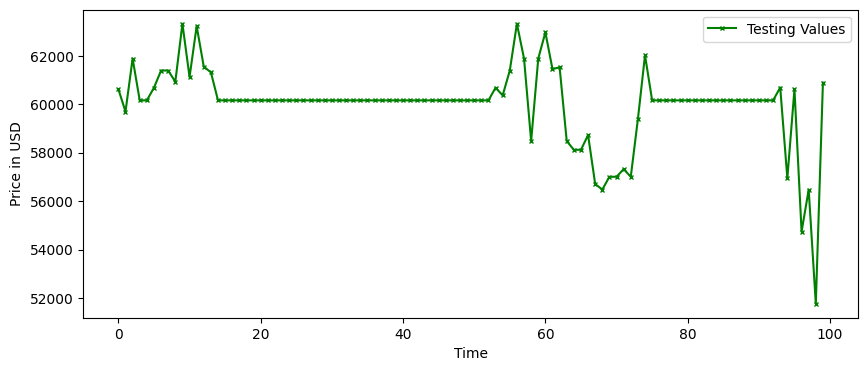

In [107]:
plt.figure(figsize=(10, 4))
plt.plot(DTR1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does

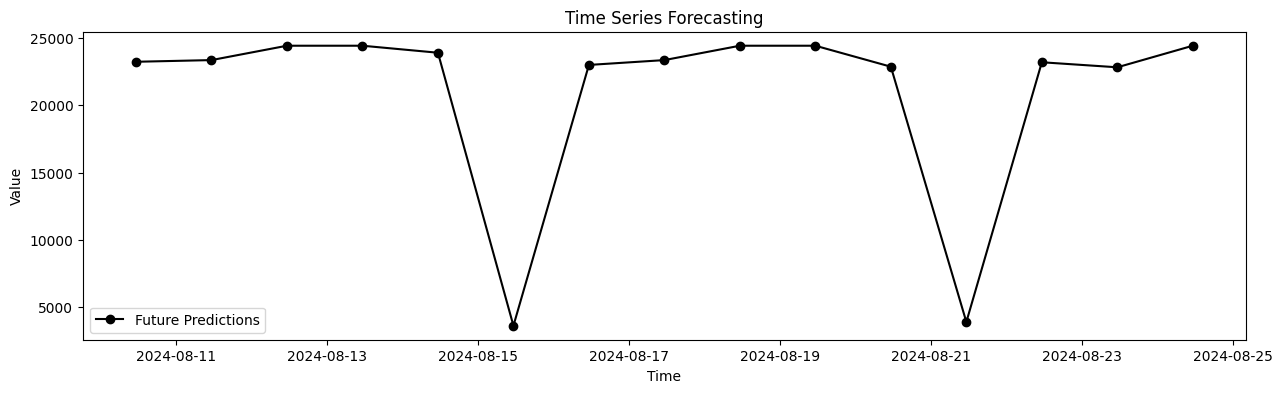

In [108]:
prediction(DTR_1, 15, x1_train, x1_test)

binance

In [117]:
DTR_2 = DecisionTreeRegressor(random_state = 0, criterion = 'friedman_mse', max_depth = 15)
DTR_2.fit(x2_train, y2_train)


DecisionTreeRegressor(criterion='friedman_mse', max_depth=15, random_state=0)

In [118]:
DTR_2.score(x2_test, y2_test)

0.9520335060262635

In [119]:
DTR2_pred = DTR_2.predict(x2_test)
mean_squared_error(y2_test, DTR2_pred)

1091.6981224571714

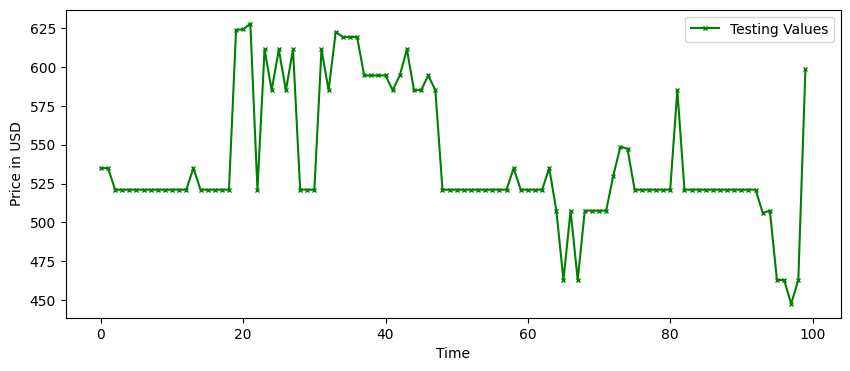

In [120]:
plt.figure(figsize=(10, 4))
plt.plot(DTR2_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

Litecoin :DECISION TREE

In [121]:
DTR_3 = DecisionTreeRegressor(random_state = 0, criterion = 'friedman_mse', max_depth = 15)
DTR_3.fit(x3_train, y3_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=15, random_state=0)

In [122]:
DTR_3.score(x3_test, y3_test)

0.9433114891001942

In [123]:
DTR3_pred = DTR_3.predict(x3_test)
mean_squared_error(y3_test, DTR3_pred)

17277750.890485216

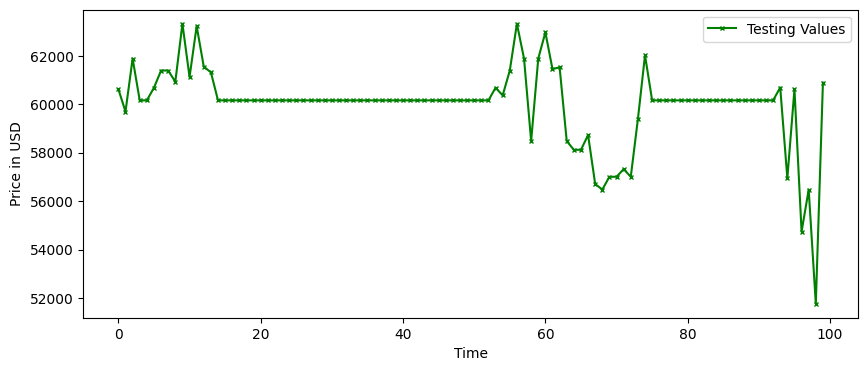

In [124]:
plt.figure(figsize=(10, 4))
plt.plot(DTR3_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

KNN: Bitcoin

In [125]:
from sklearn.neighbors import KNeighborsRegressor
knn_1 = KNeighborsRegressor(n_neighbors=18)
knn_1.fit(x1_train, y1_train)

KNeighborsRegressor(n_neighbors=18)

In [126]:
knn_1.score(x1_test, y1_test)

0.9804608142760524

In [127]:
knn1_pred = knn_1.predict(x1_test)
mean_squared_error(y1_test, knn1_pred)

5955231.1073750565

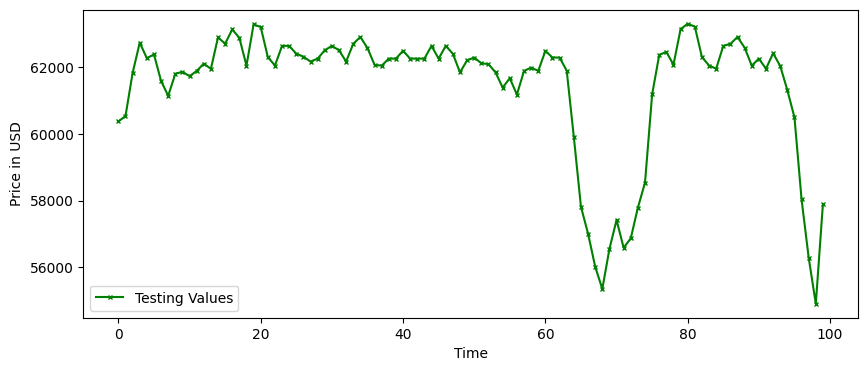

In [128]:
plt.figure(figsize=(10, 4))
plt.plot(knn1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

knn: binance

In [137]:
knn_2 = KNeighborsRegressor(n_neighbors=18)
knn_2.fit(x2_train, y2_train)

KNeighborsRegressor(n_neighbors=18)

In [138]:
knn_2.score(x2_test, y2_test)

0.002674769687009193

In [139]:
knn2_pred = knn_2.predict(x2_test)
mean_squared_error(y2_test, knn2_pred)

22698.72136179067

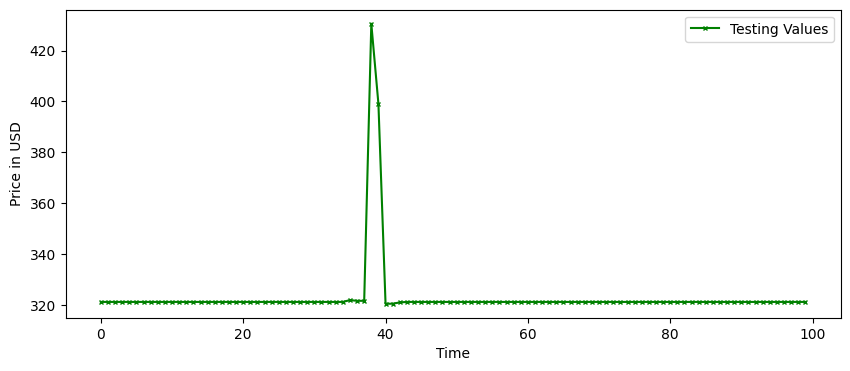

In [140]:
plt.figure(figsize=(10, 4))
plt.plot(knn2_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

knn: litecoin

In [141]:
knn_3 = KNeighborsRegressor(n_neighbors=18)
knn_3.fit(x3_train, y3_train)

KNeighborsRegressor(n_neighbors=18)

In [134]:
knn_3.score(x3_test, y3_test)

0.9804608142760524

In [135]:
knn3_pred = knn_3.predict(x3_test)
mean_squared_error(y3_test, knn3_pred)

5955231.1073750565

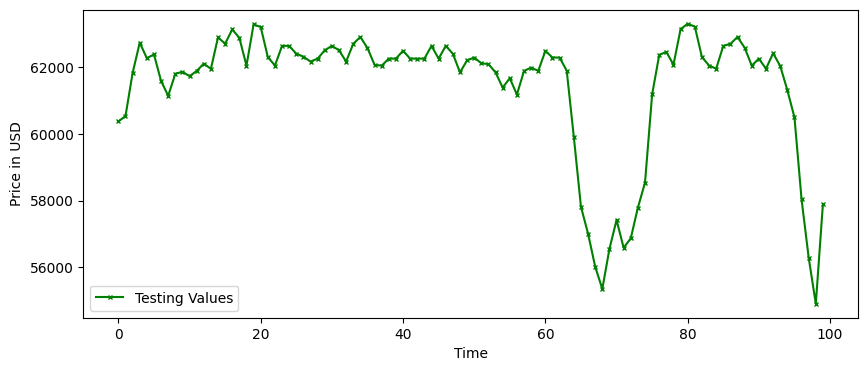

In [136]:
plt.figure(figsize=(10, 4))
plt.plot(knn3_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

Neural Network Models

In [171]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)

# Create the Feed Forward Neural Network model
FNN1 = Sequential()
FNN2 = Sequential()
FNN3 = Sequential()

# Correct the input_shape: it should only have the number of features
FNN1.add(Dense(64, activation='relu', input_shape=(x1_train.shape[1],)))  # Number of features in x1_train
FNN1.add(Dense(32, activation='relu'))
FNN1.add(Dense(1))  # Output layer with 1 unit for regression

# Compile the model
FNN1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
FNN1_his = FNN1.fit(x1_train, y1_train,epochs=50,batch_size=16, callbacks=[lr_scheduler], validation_data=(x1_test, y1_test),verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


181/181 - 2s - 14ms/step - loss: 15597589.0000 - val_loss: 2185669.2500 - learning_rate: 0.0010
Epoch 2/50
181/181 - 0s - 2ms/step - loss: 1138306.6250 - val_loss: 2051474.1250 - learning_rate: 0.0010
Epoch 3/50
181/181 - 0s - 2ms/step - loss: 1064333.5000 - val_loss: 1754873.5000 - learning_rate: 0.0010
Epoch 4/50
181/181 - 1s - 3ms/step - loss: 963941.5000 - val_loss: 1776496.0000 - learning_rate: 0.0010
Epoch 5/50
181/181 - 1s - 3ms/step - loss: 913569.2500 - val_loss: 1498932.5000 - learning_rate: 0.0010
Epoch 6/50
181/181 - 1s - 3ms/step - loss: 858321.3750 - val_loss: 1451470.8750 - learning_rate: 0.0010
Epoch 7/50
181/181 - 1s - 3ms/step - loss: 808684.5000 - val_loss: 2456242.5000 - learning_rate: 0.0010
Epoch 8/50
181/181 - 1s - 3ms/step - loss: 883923.4375 - val_loss: 1872876.0000 - learning_rate: 0.0010
Epoch 9/50
181/181 - 1s - 3ms/step - loss: 780861.6875 - val_loss: 1841921.3750 - learning_rate: 0.0010
Epoch 10/50
181/181 - 1s - 3ms/step - loss: 862804.3125 - val_loss: 16

In [161]:
FNN1_pred = FNN1.predict(x1_test)

# Calculate MSE
mse = mean_squared_error(y1_test, FNN1_pred)
print(f"Mean Squared Error (MSE): {mse}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 1259278.543006271


In [177]:
r2 = r2_score(y1_test, FNN1_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9958682917780454


In [163]:
# Calculate MAE
mae = mean_absolute_error(y1_test, FNN1_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 678.9936591066482


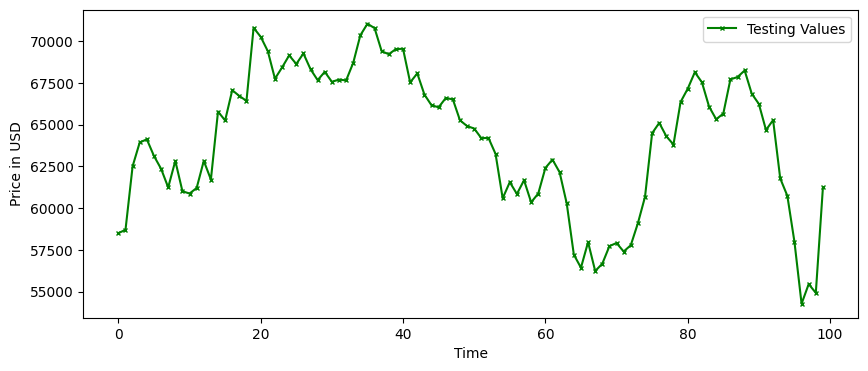

In [156]:
plt.figure(figsize=(10, 4))
plt.plot(FNN1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

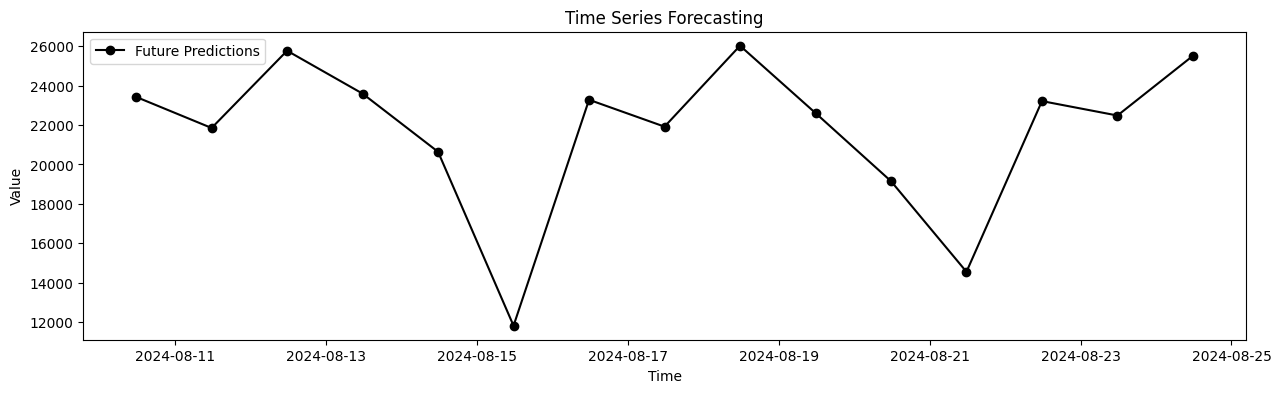

In [157]:
prediction(FNN1, 15, x1_train, x1_test)

Long Short Term Memory

In [164]:
#Preparing data
nx1_train = x1_train.values
nx1_train = np.reshape(nx1_train, (nx1_train.shape[0], nx1_train.shape[1], 1))
ny1_train = y1_train.values.tolist()

In [165]:
LSTM1 = Sequential()
LSTM1.add(LSTM(64, activation='relu',return_sequences=True, input_shape=(nx1_train.shape[1],1)))
LSTM1.add(Dense(1))
LSTM1.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [166]:
LSTM1_his = LSTM1.fit(x1_train, y1_train, epochs=80,  batch_size=32, callbacks=[lr_scheduler], validation_data=(x1_test, y1_test), verbose=2)

Epoch 1/80
91/91 - 6s - 62ms/step - loss: 200158832.0000 - val_loss: 370897056.0000 - learning_rate: 0.0010
Epoch 2/80
91/91 - 1s - 11ms/step - loss: 68444048.0000 - val_loss: 176890064.0000 - learning_rate: 0.0010
Epoch 3/80
91/91 - 1s - 6ms/step - loss: 36910956.0000 - val_loss: 106787136.0000 - learning_rate: 0.0010
Epoch 4/80
91/91 - 1s - 6ms/step - loss: 20906510.0000 - val_loss: 49032712.0000 - learning_rate: 0.0010
Epoch 5/80
91/91 - 1s - 6ms/step - loss: 8959882.0000 - val_loss: 17642176.0000 - learning_rate: 0.0010
Epoch 6/80
91/91 - 1s - 7ms/step - loss: 3080631.7500 - val_loss: 5361550.0000 - learning_rate: 0.0010
Epoch 7/80
91/91 - 1s - 6ms/step - loss: 2540566.5000 - val_loss: 14870366.0000 - learning_rate: 0.0010
Epoch 8/80
91/91 - 1s - 6ms/step - loss: 1959873.3750 - val_loss: 3142327.7500 - learning_rate: 0.0010
Epoch 9/80
91/91 - 1s - 6ms/step - loss: 5536475.0000 - val_loss: 9023802.0000 - learning_rate: 0.0010
Epoch 10/80
91/91 - 1s - 7ms/step - loss: 1301041.3750 - 

In [167]:
LSTM1_pred = LSTM1.predict(x1_test)
LSTM1_pred = LSTM1_pred.ravel()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


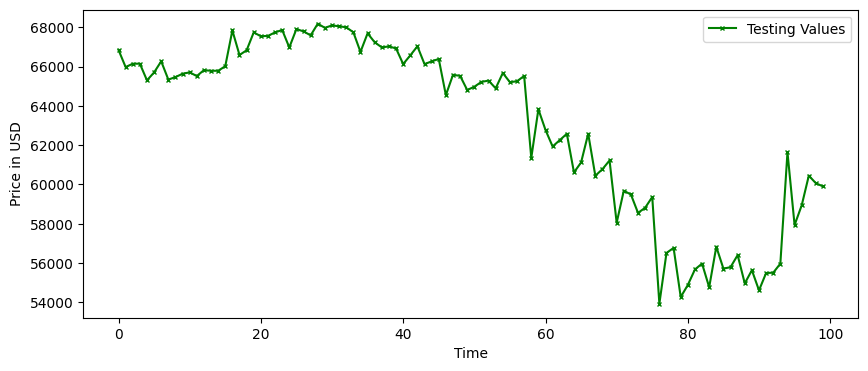

In [168]:
plt.figure(figsize=(10, 4))
plt.plot(LSTM1_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

Random Forest

In [203]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x1_train, y1_train)
predictions = model.predict(x1_test)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [204]:
model_pred = model.predict(x1_test)

# Calculate MSE
mse = mean_squared_error(y1_test, model_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 6740872.233045916


In [205]:
r2 = r2_score(y1_test, model_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9778831161833883


XGBOOST

In [206]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(x1_train, y1_train)
predictions = model.predict(x1_test)

In [207]:
xgb_pred = model.predict(x1_test)

# Calculate MSE
mse = mean_squared_error(y1_test, xgb_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 7605281.034380992


In [208]:
r2 = r2_score(y1_test, xgb_pred)
print(f"R-squared (R²): {r2}")

R-squared (R²): 0.9750469803884593


We will be using Feed Forward Neural Network for our project

In [187]:
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
FNN2 = Sequential()
FNN2.add(Dense(64, activation='relu', input_shape=(x2_train.shape[1],)))  # Number of features in x1_train
FNN2.add(Dense(32, activation='relu'))
FNN2.add(Dense(1))  # Output layer with 1 unit for regression

# Compile the model
FNN2.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
FNN2_his = FNN1.fit(x2_train, y2_train,epochs=50,batch_size=16, callbacks=[lr_scheduler], validation_data=(x2_test, y2_test),verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


123/123 - 1s - 4ms/step - loss: 7008.9551 - val_loss: 17371.4316 - learning_rate: 1.0000e-06
Epoch 2/50
123/123 - 1s - 4ms/step - loss: 6849.4819 - val_loss: 16722.5742 - learning_rate: 1.0000e-06
Epoch 3/50
123/123 - 0s - 3ms/step - loss: 6694.3291 - val_loss: 16092.8672 - learning_rate: 1.0000e-06
Epoch 4/50
123/123 - 0s - 3ms/step - loss: 6543.7896 - val_loss: 15477.5332 - learning_rate: 1.0000e-06
Epoch 5/50
123/123 - 0s - 2ms/step - loss: 6397.7593 - val_loss: 14890.7578 - learning_rate: 1.0000e-06
Epoch 6/50
123/123 - 0s - 2ms/step - loss: 6256.0693 - val_loss: 14323.3828 - learning_rate: 1.0000e-06
Epoch 7/50
123/123 - 0s - 2ms/step - loss: 6118.6870 - val_loss: 13766.7803 - learning_rate: 1.0000e-06
Epoch 8/50
123/123 - 0s - 3ms/step - loss: 5985.3716 - val_loss: 13243.0000 - learning_rate: 1.0000e-06
Epoch 9/50
123/123 - 0s - 2ms/step - loss: 5856.2227 - val_loss: 12735.1113 - learning_rate: 1.0000e-06
Epoch 10/50
123/123 - 0s - 2ms/step - loss: 5731.2354 - val_loss: 12240.280

In [188]:
FNN2_pred = FNN2.predict(x2_test)

# Calculate MSE
mse = mean_squared_error(y2_test, FNN2_pred)
print(f"Mean Squared Error (MSE): {mse}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error (MSE): 18444.090776689925


In [189]:
# Calculate MAE
mae = mean_absolute_error(y2_test, FNN2_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 111.57461473569425


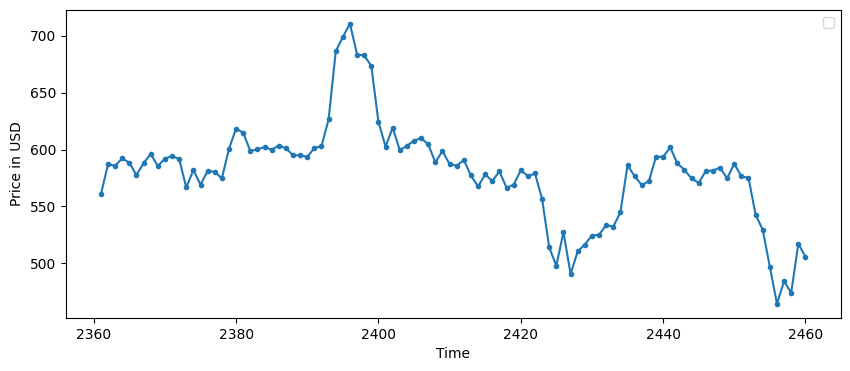

In [195]:
plt.figure(figsize=(10, 4))
plt.plot(data_2['Close'][-100:], marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

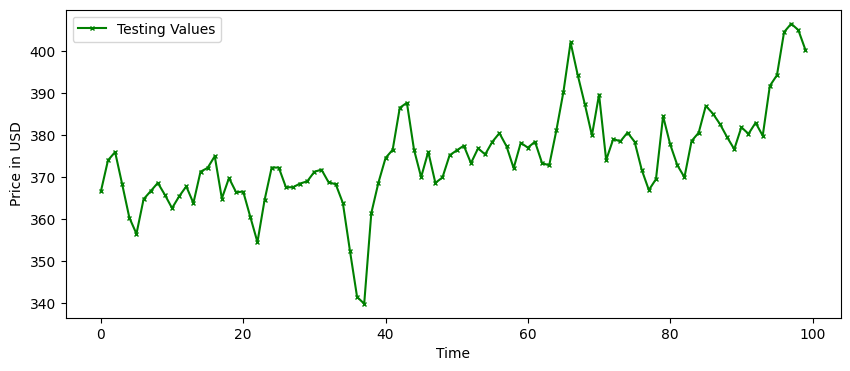

In [196]:
plt.figure(figsize=(10, 4))
plt.plot(FNN2_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


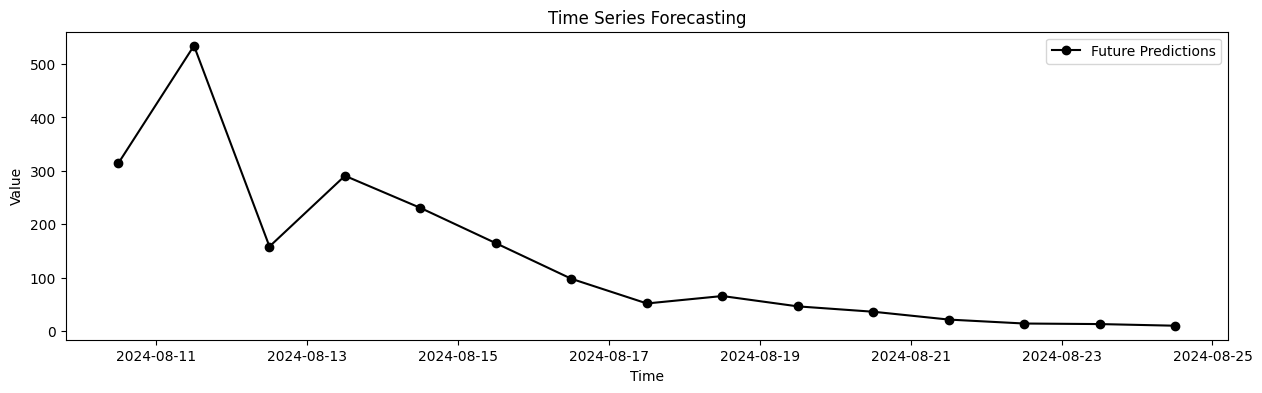

In [197]:
prediction(FNN2, 15, x2_train, x2_test)

In [190]:
lr_scheduler = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
FNN3 = Sequential()
FNN3.add(Dense(64, activation='relu', input_shape=(x3_train.shape[1],)))  # Number of features in x1_train
FNN3.add(Dense(32, activation='relu'))
FNN3.add(Dense(1))  # Output layer with 1 unit for regression

# Compile the model
FNN3.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
FNN3_his = FNN1.fit(x3_train, y3_train,epochs=50,batch_size=16, callbacks=[lr_scheduler], validation_data=(x3_test, y3_test),verbose=2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


181/181 - 0s - 2ms/step - loss: 704407.9375 - val_loss: 1324758.3750 - learning_rate: 1.0000e-06
Epoch 2/50
181/181 - 1s - 3ms/step - loss: 671594.8125 - val_loss: 1295741.3750 - learning_rate: 1.0000e-06
Epoch 3/50
181/181 - 1s - 4ms/step - loss: 669207.2500 - val_loss: 1286626.0000 - learning_rate: 1.0000e-06
Epoch 4/50
181/181 - 0s - 2ms/step - loss: 668398.1250 - val_loss: 1285092.6250 - learning_rate: 1.0000e-06
Epoch 5/50
181/181 - 0s - 2ms/step - loss: 668582.5625 - val_loss: 1284699.5000 - learning_rate: 1.0000e-06
Epoch 6/50
181/181 - 1s - 4ms/step - loss: 668359.9375 - val_loss: 1282953.3750 - learning_rate: 1.0000e-06
Epoch 7/50
181/181 - 1s - 6ms/step - loss: 668556.8125 - val_loss: 1283197.7500 - learning_rate: 1.0000e-06
Epoch 8/50
181/181 - 1s - 6ms/step - loss: 668037.0625 - val_loss: 1284090.1250 - learning_rate: 1.0000e-06
Epoch 9/50
181/181 - 1s - 6ms/step - loss: 668106.7500 - val_loss: 1283763.0000 - learning_rate: 1.0000e-06
Epoch 10/50
181/181 - 1s - 5ms/step - l

In [192]:
FNN3_pred = FNN3.predict(x3_test)

# Calculate MSE
mse = mean_squared_error(y3_test, FNN3_pred)
print(f"Mean Squared Error (MSE): {mse}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Mean Squared Error (MSE): 887517297.3572322


In [193]:
# Calculate MAE
mae = mean_absolute_error(y3_test, FNN3_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 26940.37679250617


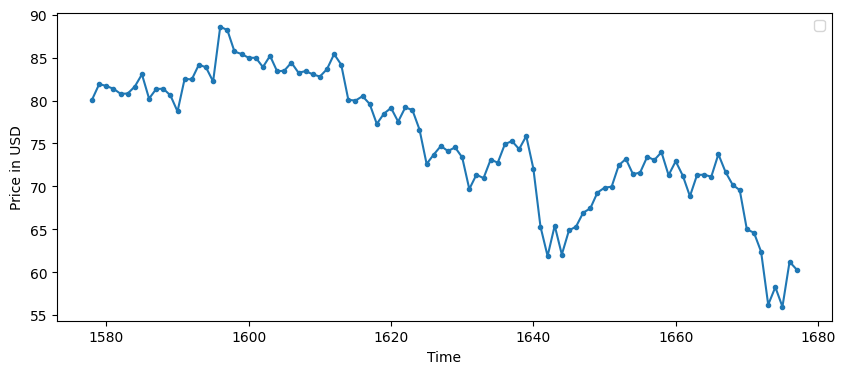

In [198]:
plt.figure(figsize=(10, 4))
plt.plot(data_3['Close'][-100:], marker = 'o', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

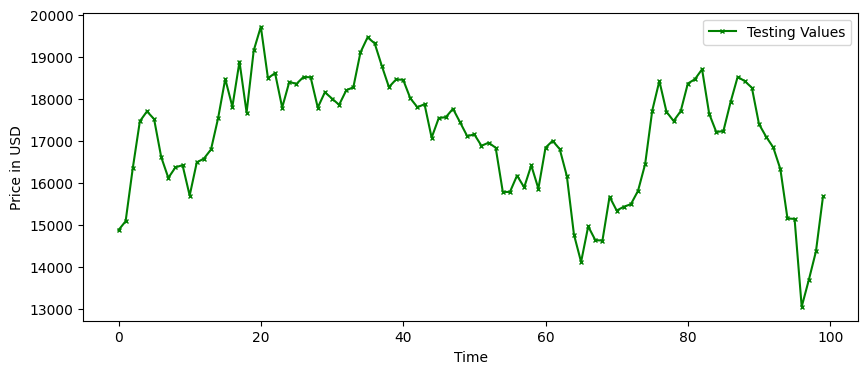

In [199]:
plt.figure(figsize=(10, 4))
plt.plot(FNN3_pred[-100:], label='Testing Values', marker = 'x',color = 'green', markersize = 3)
plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


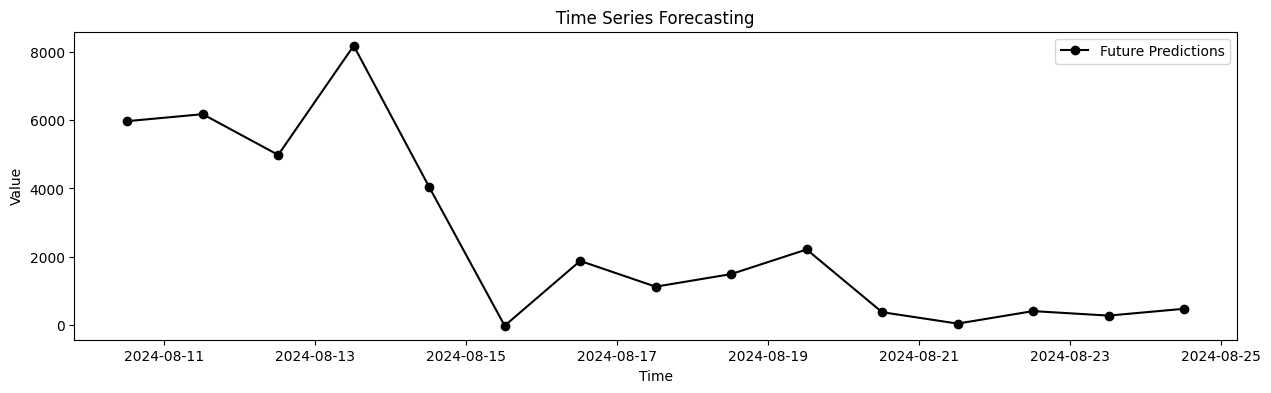

In [200]:
prediction(FNN3, 15, x3_train, x3_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


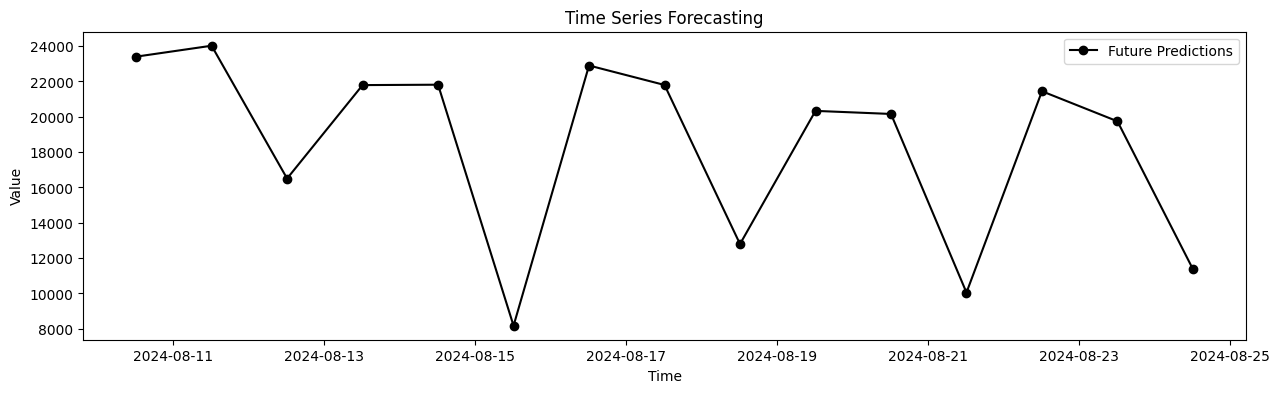

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


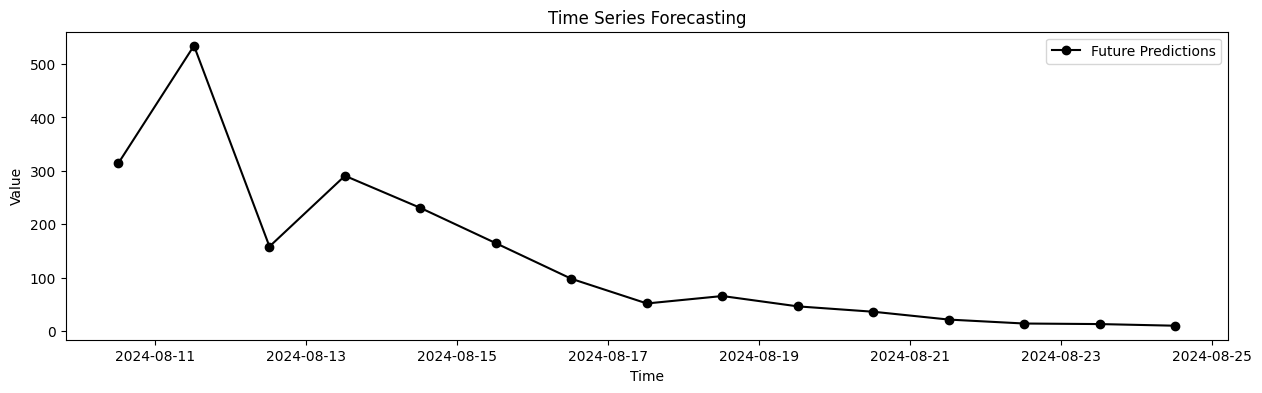

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = fu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment
<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<ipython-input-74-1871dd2c86b6>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  future_features[0, -1] = future_pred[0]  # Use future_pred[0] to ensure correct scalar assignment


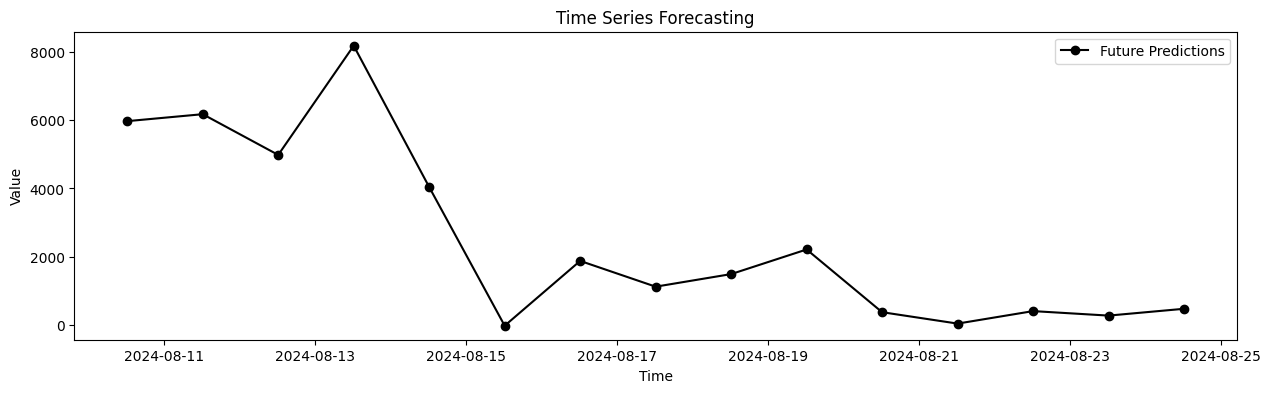

In [202]:
import tensorflow as tf
#Save the models
FNN1.save('btc_model.h5')
FNN2.save('bnb_model.h5')
FNN3.save('lt_model.h5')
#Reload the models
FNN1_loaded = tf.keras.models.load_model('btc_model.h5')
FNN2_loaded = tf.keras.models.load_model('bnb_model.h5')
FNN3_loaded = tf.keras.models.load_model('lt_model.h5')
#Make predictions
prediction(FNN1_loaded, 15, x1_train, x1_test)
prediction(FNN2_loaded, 15, x2_train, x2_test)
prediction(FNN3_loaded, 15, x3_train, x3_test)